# Task 3: Customer Churn Prediction

## Bank Customers - Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# 1. Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# 2. Clean and Prepare the Data
# Drop columns that are unique to individuals and don't help in prediction
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [4]:
# 3. Encode Categorical Features
# Label Encoding for 'Gender' (Binary: Female/Male)
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

# One-Hot Encoding for 'Geography' (Multiple categories: France, Germany, Spain)
# We use drop_first=True to avoid the dummy variable trap
df_clean = pd.get_dummies(df_clean, columns=['Geography'], drop_first=True)

In [5]:
# 4. Train-Test Split
# Define Features (X) and Target (y)
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited']

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# 5. Train the Classification Model
# We use a Random Forest Classifier for its robustness and built-in feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# 6. Evaluate the Model
y_pred = rf_model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8610

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [8]:
# 7. Analyze Feature Importance
# Extract importance values from the trained model
feature_importances = pd.Series(
    rf_model.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

C:\Users\Hp\AppData\Local\Temp\ipykernel_10676\921211778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


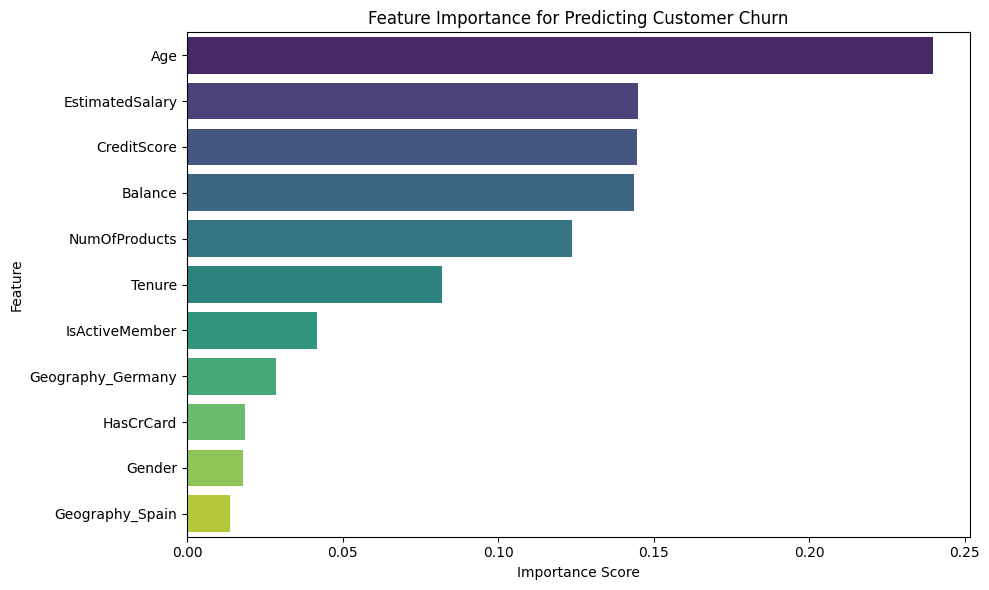

In [9]:
# Visualize the Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance for Predicting Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [10]:
# Save the cleaned dataset for future use
df_clean.to_csv('cleaned_churn_data.csv', index=False)